In [1]:
import pandas as pd
import numpy as np
import math
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style(theme='solarizedd')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

import data_utils_mt.utils as utils
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime as dt

ROOT = '../..'
DATA = os.path.join(ROOT, 'data')
DATA_RAW = os.path.join(DATA, 'raw')
SRC = os.path.join(ROOT, 'src')

import sys
sys.path.append(SRC)

import src.data.preprocessing as pp

In [2]:
# read in the json files
portfolio = pd.read_json(os.path.join(DATA_RAW, 'portfolio.json'), orient='records', lines=True)
profile = pd.read_json(os.path.join(DATA_RAW, 'profile.json'), orient='records', lines=True)
transcript = pd.read_json(os.path.join(DATA_RAW, 'transcript.json'), orient='records', lines=True)

In [3]:
portfolio = pp.process_portfolio(portfolio)
portfolio

,difficulty,duration,id,offer_type,reward,channel_mobile,channel_social,channel_web,channel_email
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,0,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,0,1,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,1,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,0,1,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,0,1,1


In [4]:
profile = pp.process_profile(profile)
print(profile.shape)
profile.head()

(17000, 7)


,age,became_member_on,gender,id,income,missing_demographics,member_epoch_days
0,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,1,17209
1,55.0,2017-07-15,0.0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,17362
2,NaN,2018-07-12,NaN,38fe809add3b4fcf9315a9694bb96ff5,NaN,1,17724
3,75.0,2017-05-09,0.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,17295
4,NaN,2017-08-04,NaN,a03223e636434f42ac4c3df47e8bac43,NaN,1,17382


In [5]:
transcript = pp.process_transcript(transcript)
print(transcript.shape)
transcript.head()

(306534, 6)


,event,person,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [6]:
# read in the json files
portfolio = pd.read_json(os.path.join(DATA_RAW, 'portfolio.json'), orient='records', lines=True)
profile = pd.read_json(os.path.join(DATA_RAW, 'profile.json'), orient='records', lines=True)
transcript = pd.read_json(os.path.join(DATA_RAW, 'transcript.json'), orient='records', lines=True)

data, portfolio = pp.basic_preprocessing(portfolio, profile, transcript)

In [7]:
print(data.shape)
data.head()

(306534, 20)


,event,person,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,7.0,bogo,5.0,1.0,0.0,1.0,1.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,2017-08-04,NaN,NaN,1,17382,20.0,10.0,discount,5.0,0.0,0.0,1.0,1.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,2018-04-26,1.0,70000.0,0,17647,10.0,7.0,discount,2.0,1.0,0.0,1.0,1.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,2017-09-25,NaN,NaN,1,17434,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,2017-10-02,NaN,NaN,1,17441,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0


### Let's create the first dataset

In [ ]:
person = data[data.person == data.person.iloc[0]]

In [22]:
def split_transcript(transcript):
    """ 
    Separates the different kinds of events in different dataframes. 
    Args:
        transcript(pd.DataFrame): Similar to the raw transcript data.
    
    Returns:
        received(pd.DataFrame): Contains the reception events.
        veiwed(pd.DataFrame): Contains the offer view events.
        completed(pd.DataFrame): Contains the offer completion events.
        transactions(pd.DataFrame): Contains the transactions.
    """
    received = transcript[transcript.event == 'offer received']
    viewed = transcript[transcript.event == 'offer viewed']
    completed = transcript[transcript.event == 'offer completed']
    transactions = transcript[transcript.event == 'transaction']
    
    return received, viewed, completed, transactions

In [23]:
received, viewed, completed, transactions = split_transcript(person)

In [24]:
received

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email
0,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,7.0,bogo,5.0,1.0,0.0,1.0,1.0
53176,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,0.0,3.0,informational,0.0,1.0,1.0,0.0,1.0
150598,offer received,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,10.0,7.0,bogo,10.0,1.0,1.0,0.0,1.0
201572,offer received,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0


In [25]:
viewed

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email
15561,offer viewed,6,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,7.0,bogo,5.0,1.0,0.0,1.0,1.0
85291,offer viewed,216,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,0.0,3.0,informational,0.0,1.0,1.0,0.0,1.0
163375,offer viewed,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,10.0,7.0,bogo,10.0,1.0,1.0,0.0,1.0
262138,offer viewed,582,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0


In [26]:
completed

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email
47583,offer completed,132,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,7.0,bogo,5.0,1.0,0.0,1.0,1.0
218394,offer completed,510,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0,75.0,2017-05-09,0.0,100000.0,0,17295,10.0,7.0,bogo,10.0,1.0,1.0,0.0,1.0
218395,offer completed,510,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0


In [27]:
transactions

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email
47582,transaction,132,19.89,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49502,transaction,144,17.78,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87134,transaction,222,19.67,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92104,transaction,240,29.72,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141566,transaction,378,23.93,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218393,transaction,510,21.72,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230412,transaction,534,26.56,NaN,NaN,75.0,2017-05-09,0.0,100000.0,0,17295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def fill_completion(received, completed):
    """
    Looks in the records of one person and checks which offers where completed.
    A 'completed' column is set to 1 when the offer was completed. The finish
    time is also added.
    Args:
        received(pd.DataFrame): As returned from split_transcript
        completed(pd.DataFrame): As returned from split_transcript
    
    Returns:
        pd.DataFrame: The received dataframe with some new columns.
    """
    results = list()
    for idx, row in received.iterrows():
        record = dict()
    
        # Identify the record
        record['time'] = row.time
        record['offer_id'] = row.offer_id
        
        record['expected_finish'] = row.time + row.duration * 24
        completion = completed[(completed.offer_id == row.offer_id) & 
                               (completed.time >= row.time) &
                               (completed.time <= record['expected_finish'])]
        if completion.shape[0] > 0:
            record['completed'] = 1
            record['finish'] = completion.time.iloc[0]
        else:
            record['completed'] = 0
            record['finish'] = record['expected_finish']

        results.append(record)

    return received.merge(pd.DataFrame(results), on=['time', 'offer_id'], 
                          how='left')

In [29]:
fill_completion(received, completed)

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,...,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email,completed,expected_finish,finish
0,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,...,7.0,bogo,5.0,1.0,0.0,1.0,1.0,1,168.0,132.0
1,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,75.0,2017-05-09,0.0,100000.0,0,...,3.0,informational,0.0,1.0,1.0,0.0,1.0,0,240.0,240.0
2,offer received,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,75.0,2017-05-09,0.0,100000.0,0,...,7.0,bogo,10.0,1.0,1.0,0.0,1.0,1,576.0,510.0
3,offer received,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,75.0,2017-05-09,0.0,100000.0,0,...,5.0,bogo,5.0,1.0,1.0,1.0,1.0,1,624.0,510.0


In [31]:
def fill_viewed(data, viewed):
    """
    Checks if the offer was viewed in the active period of the offers.
    Also fills a column called 'success' that tracks whether an offer 
    completion happened after a view.
    Args:
        data(pd.DataFrame): As returned from fill_completed
        viewed(pd.DataFrame): As returned from split_transcript
    
    Returns:
        pd.DataFrame: The received dataframe with some new columns.
    """
    results = list()
    for idx, row in data.iterrows():
        record = dict()
    
        # Identify the record
        record['time'] = row.time
        record['offer_id'] = row.offer_id
        
        views = viewed[(viewed.offer_id == viewed.offer_id) & 
                       (viewed.time >= row.time) &
                       (viewed.time <= row.finish)]
        if views.shape[0] > 0:
            record['viewed'] = 1
            record['view_time'] = views.time.iloc[0]
            if (record['view_time'] <= row.finish) and row.completed:
                record['success'] = 1
            else:
                record['success'] = 0
        else:
            record['viewed'] = 0
            record['view_time'] = np.nan
            record['success'] = 0

        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'], 
                          how='left')

In [32]:
received, viewed, completed, transactions = split_transcript(person)
data = fill_completion(received, completed)
data = fill_viewed(data, viewed)
data

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,...,channel_mobile,channel_social,channel_web,channel_email,completed,expected_finish,finish,success,view_time,viewed
0,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,0.0,1.0,1.0,1,168.0,132.0,1,6.0,1
1,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1.0,0.0,1.0,0,240.0,240.0,0,216.0,1
2,offer received,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1.0,0.0,1.0,1,576.0,510.0,1,408.0,1
3,offer received,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1.0,1.0,1.0,1,624.0,510.0,0,NaN,0


In [37]:
def fill_profits(data, transactions):
    """
    Checks if the offer was viewed in the active period of the offers.
    Args:
        data(pd.DataFrame): As returned from fill_completed
        viewed(pd.DataFrame): As returned from split_transcript
    
    Returns:
        pd.DataFrame: The received dataframe with some new columns.
    """
    results = list()
    for idx, row in data.iterrows():
        record = dict()
    
        # Identify the record
        record['time'] = row.time
        record['offer_id'] = row.offer_id
        
        included_tr = transactions[(transactions.time >= row.time) &
                           (transactions.time <= row.finish)]
        record['spent'] = included_tr.amount.sum()
        record['actual_reward'] = row.reward_t if row.completed == 1 else 0
        record['profit'] = record['spent'] - record['actual_reward']

        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'], 
                          how='left')

In [38]:
fill_profits(data, transactions)

,event,time,amount,offer_id,reward,age,became_member_on,gender,income,missing_demographics,...,channel_email,completed,expected_finish,finish,success,view_time,viewed,actual_reward,profit,spent
0,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1,168.0,132.0,1,6.0,1,5.0,14.89,19.89
1,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,0,240.0,240.0,0,216.0,1,0.0,49.39,49.39
2,offer received,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1,576.0,510.0,1,408.0,1,10.0,11.72,21.72
3,offer received,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,75.0,2017-05-09,0.0,100000.0,0,...,1.0,1,624.0,510.0,0,NaN,0,5.0,16.72,21.72


In [67]:
def generate_static_dataset(person_data):
    """
    Generates a dataset that contains a row for each sent offer, and adds some
    'results' columns, like whether the offer was viewed, completed, when did
    the offer finish, how much was spent by the user while the offer was 
    active, the total profit in the period, and the reward paid.
    """
    received, \
    viewed, \
    completed, \
    transactions = split_transcript(person_data)
    if received.shape[0] == 0:
        return None
    data = fill_completion(received, completed)
    data = fill_viewed(data, viewed)
    data = fill_profits(data, transactions)
    
    return data.drop(['event', 'reward', 'amount'], axis=1)

In [40]:
p_data = generate_static_dataset(person)
p_data

,time,amount,offer_id,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,...,channel_email,completed,expected_finish,finish,success,view_time,viewed,actual_reward,profit,spent
0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,...,1.0,1,168.0,132.0,1,6.0,1,5.0,14.89,19.89
1,168,NaN,5a8bc65990b245e5a138643cd4eb9837,75.0,2017-05-09,0.0,100000.0,0,17295,0.0,...,1.0,0,240.0,240.0,0,216.0,1,0.0,49.39,49.39
2,408,NaN,ae264e3637204a6fb9bb56bc8210ddfd,75.0,2017-05-09,0.0,100000.0,0,17295,10.0,...,1.0,1,576.0,510.0,1,408.0,1,10.0,11.72,21.72
3,504,NaN,f19421c1d4aa40978ebb69ca19b0e20d,75.0,2017-05-09,0.0,100000.0,0,17295,5.0,...,1.0,1,624.0,510.0,0,NaN,0,5.0,16.72,21.72


In [41]:
p_data.columns

Index(['time', 'amount', 'offer_id', 'age', 'became_member_on', 'gender',
       'income', 'missing_demographics', 'member_epoch_days', 'difficulty',
       'duration', 'offer_type', 'reward_t', 'channel_mobile',
       'channel_social', 'channel_web', 'channel_email', 'completed',
       'expected_finish', 'finish', 'success', 'view_time', 'viewed',
       'actual_reward', 'profit', 'spent'],
      dtype='object')

### How long would it take to create the entire dataset?

In [42]:
# read in the json files
portfolio = pd.read_json(os.path.join(DATA_RAW, 'portfolio.json'), orient='records', lines=True)
profile = pd.read_json(os.path.join(DATA_RAW, 'profile.json'), orient='records', lines=True)
transcript = pd.read_json(os.path.join(DATA_RAW, 'transcript.json'), orient='records', lines=True)

data, portfolio = pp.basic_preprocessing(portfolio, profile, transcript)

In [43]:
import data_utils_mt.utils as utils
from time import time

In [200]:
num_people = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
delays = list()
for n in num_people:
    people = np.random.choice(data.person, n)
    sub_data = data[data.person.isin(people)]
    tic = time()
    static_data = sub_data.groupby('person').apply(generate_static_dataset)
    toc = time()
    delays.append(toc - tic)
    print('For {} people the time to compute the dataset is {} seconds.'.format(
    n, (toc - tic)))

For 100 people the time to compute the dataset is 6.3757359981536865 seconds.
For 200 people the time to compute the dataset is 11.859554767608643 seconds.
For 300 people the time to compute the dataset is 18.59238886833191 seconds.
For 400 people the time to compute the dataset is 22.961210012435913 seconds.
For 500 people the time to compute the dataset is 29.51251196861267 seconds.
For 600 people the time to compute the dataset is 35.862914085388184 seconds.
For 700 people the time to compute the dataset is 40.40401315689087 seconds.
For 800 people the time to compute the dataset is 46.016350984573364 seconds.
For 900 people the time to compute the dataset is 50.54213523864746 seconds.
For 1000 people the time to compute the dataset is 59.81084108352661 seconds.


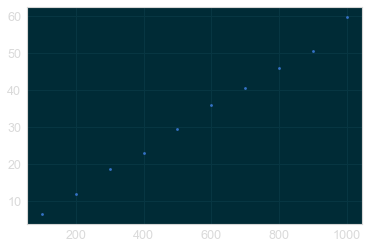

In [202]:
plt.plot(num_people, delays, '.')

In [204]:
num_people = [2000, 3000, 5000]
delays = list()
for n in num_people:
    people = np.random.choice(data.person, n)
    sub_data = data[data.person.isin(people)]
    tic = time()
    static_data = sub_data.groupby('person').apply(generate_static_dataset)
    toc = time()
    delays.append(toc - tic)
    print('For {} people the time to compute the dataset is {} seconds.'.format(
    n, (toc - tic)))

For 2000 people the time to compute the dataset is 122.35168123245239 seconds.
For 3000 people the time to compute the dataset is 178.68795228004456 seconds.
For 5000 people the time to compute the dataset is 216.66683292388916 seconds.


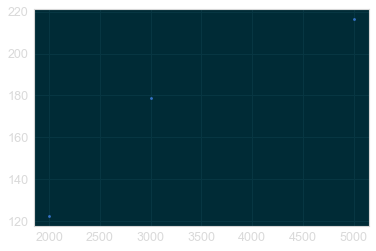

In [205]:
plt.plot(num_people, delays, '.')

### Let's create the dataset

In [44]:
%time static_data = data.groupby('person').apply(generate_static_dataset)

CPU times: user 16min 13s, sys: 20.9 s, total: 16min 34s
Wall time: 17min 41s


In [46]:
static_data = static_data.reset_index(drop=True)
static_data.head(15)

,person,time,amount,offer_id,age,became_member_on,gender,income,missing_demographics,member_epoch_days,...,channel_email,completed,expected_finish,finish,success,view_time,viewed,actual_reward,profit,spent
0,0009655768c64bdeb2e877511632db8f,168,NaN,5a8bc65990b245e5a138643cd4eb9837,33.0,2017-04-21,1.0,72000.0,0,17277,...,1.0,0,240.0,240.0,0,192.0,1,0.0,22.16,22.16
1,0009655768c64bdeb2e877511632db8f,336,NaN,3f207df678b143eea3cee63160fa8bed,33.0,2017-04-21,1.0,72000.0,0,17277,...,1.0,0,432.0,432.0,0,372.0,1,0.0,8.57,8.57
2,0009655768c64bdeb2e877511632db8f,408,NaN,f19421c1d4aa40978ebb69ca19b0e20d,33.0,2017-04-21,1.0,72000.0,0,17277,...,1.0,1,528.0,414.0,0,NaN,0,5.0,3.57,8.57
3,0009655768c64bdeb2e877511632db8f,504,NaN,fafdcd668e3743c1bb461111dcafc2a4,33.0,2017-04-21,1.0,72000.0,0,17277,...,1.0,1,744.0,528.0,0,NaN,0,2.0,12.11,14.11
4,0009655768c64bdeb2e877511632db8f,576,NaN,2906b810c7d4411798c6938adc9daaa5,33.0,2017-04-21,1.0,72000.0,0,17277,...,1.0,1,744.0,576.0,0,NaN,0,2.0,8.27,10.27
5,00116118485d4dfda04fdbaba9a87b5c,168,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2018-04-25,NaN,NaN,1,17646,...,1.0,0,288.0,288.0,0,216.0,1,0.0,0.00,0.00
6,00116118485d4dfda04fdbaba9a87b5c,576,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2018-04-25,NaN,NaN,1,17646,...,1.0,0,696.0,696.0,0,630.0,1,0.0,0.00,0.00
7,0011e0d4e6b944f998e987f904e8c1e5,0,NaN,3f207df678b143eea3cee63160fa8bed,40.0,2018-01-09,2.0,57000.0,0,17540,...,1.0,0,96.0,96.0,0,6.0,1,0.0,0.00,0.00
8,0011e0d4e6b944f998e987f904e8c1e5,168,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,40.0,2018-01-09,2.0,57000.0,0,17540,...,1.0,1,336.0,252.0,1,186.0,1,3.0,8.93,11.93
9,0011e0d4e6b944f998e987f904e8c1e5,336,NaN,5a8bc65990b245e5a138643cd4eb9837,40.0,2018-01-09,2.0,57000.0,0,17540,...,1.0,0,408.0,408.0,0,354.0,1,0.0,0.00,0.00


In [47]:
static_data.to_pickle(os.path.join(DATA, 'interim', 'static_data.pkl'))

### Just for fun, let's make a quick train of one predictor

In [49]:
import xgboost as xgb

Separate train and test sets (there will be some non-causality, but I will accept that for this quick test. In fact, future columns shall be separated and used, typically as targets)


In [52]:
static_data.time.value_counts().sort_index()

0      12650
168    12669
336    12711
408    12778
504    12704
576    12765
Name: time, dtype: int64

Let's keep the last two offering campaigns as the test set.

In [53]:
static_data.columns

Index(['person', 'time', 'amount', 'offer_id', 'age', 'became_member_on',
       'gender', 'income', 'missing_demographics', 'member_epoch_days',
       'difficulty', 'duration', 'offer_type', 'reward_t', 'channel_mobile',
       'channel_social', 'channel_web', 'channel_email', 'completed',
       'expected_finish', 'finish', 'success', 'view_time', 'viewed',
       'actual_reward', 'profit', 'spent'],
      dtype='object')

In [55]:
future_info = ['finish', 'success', 'view_time', 'viewed', 'actual_reward',
               'profit', 'spent']

For this quick test, let's use the "success" column as target. That is, whether or not the customer has seen the offer and completed it.

In [72]:
t_limit = 450

X_train = static_data[static_data.time < t_limit].drop(future_info, axis=1)
y_train = static_data.loc[static_data.time < t_limit, 'success']
X_test = static_data[static_data.time >= t_limit].drop(future_info, axis=1)
y_test = static_data.loc[static_data.time >= t_limit, 'success']

In [73]:
print(X_train.shape)
X_train.head()

(50808, 19)


,person,time,offer_id,age,became_member_on,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email,completed,expected_finish
0,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,33.0,2017-04-21,1.0,72000.0,0,17277,0.0,3.0,informational,0.0,1.0,1.0,0.0,1.0,0,240.0
1,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,33.0,2017-04-21,1.0,72000.0,0,17277,0.0,4.0,informational,0.0,1.0,0.0,1.0,1.0,0,432.0
2,0009655768c64bdeb2e877511632db8f,408,f19421c1d4aa40978ebb69ca19b0e20d,33.0,2017-04-21,1.0,72000.0,0,17277,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,1,528.0
5,00116118485d4dfda04fdbaba9a87b5c,168,f19421c1d4aa40978ebb69ca19b0e20d,NaN,2018-04-25,NaN,NaN,1,17646,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,0,288.0
7,0011e0d4e6b944f998e987f904e8c1e5,0,3f207df678b143eea3cee63160fa8bed,40.0,2018-01-09,2.0,57000.0,0,17540,0.0,4.0,informational,0.0,1.0,0.0,1.0,1.0,0,96.0


In [74]:
y_train.mean()

0.33421902062667297

In [75]:
def anonimize_data(data):
    """
    Takes a 'static data' dataframe and converts it into an anonymized dataset.
    """
    return data.drop(['person', 'offer_id', 'became_member_on'], axis=1)

In [76]:
X_train = anonimize_data(X_train)
X_test = anonimize_data(X_test)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50808 entries, 0 to 76274
Data columns (total 16 columns):
time                    50808 non-null int64
age                     44288 non-null float64
gender                  44288 non-null float64
income                  44288 non-null float64
missing_demographics    50808 non-null int64
member_epoch_days       50808 non-null int64
difficulty              50808 non-null float64
duration                50808 non-null float64
offer_type              50808 non-null object
reward_t                50808 non-null float64
channel_mobile          50808 non-null float64
channel_social          50808 non-null float64
channel_web             50808 non-null float64
channel_email           50808 non-null float64
completed               50808 non-null int64
expected_finish         50808 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 6.6+ MB


In [78]:
X_train.head()

,time,age,gender,income,missing_demographics,member_epoch_days,difficulty,duration,offer_type,reward_t,channel_mobile,channel_social,channel_web,channel_email,completed,expected_finish
0,168,33.0,1.0,72000.0,0,17277,0.0,3.0,informational,0.0,1.0,1.0,0.0,1.0,0,240.0
1,336,33.0,1.0,72000.0,0,17277,0.0,4.0,informational,0.0,1.0,0.0,1.0,1.0,0,432.0
2,408,33.0,1.0,72000.0,0,17277,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,1,528.0
5,168,NaN,NaN,NaN,1,17646,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,0,288.0
7,0,40.0,2.0,57000.0,0,17540,0.0,4.0,informational,0.0,1.0,0.0,1.0,1.0,0,96.0


Let's label encode the offer type, and fill the missing demographics.

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
offer_type_enc = LabelEncoder()
offer_type_enc.fit(X_train.offer_type)

LabelEncoder()

In [82]:
X_train.offer_type = offer_type_enc.transform(X_train.offer_type)
X_test.offer_type = offer_type_enc.transform(X_test.offer_type)

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50808 entries, 0 to 76274
Data columns (total 16 columns):
time                    50808 non-null int64
age                     44288 non-null float64
gender                  44288 non-null float64
income                  44288 non-null float64
missing_demographics    50808 non-null int64
member_epoch_days       50808 non-null int64
difficulty              50808 non-null float64
duration                50808 non-null float64
offer_type              50808 non-null int64
reward_t                50808 non-null float64
channel_mobile          50808 non-null float64
channel_social          50808 non-null float64
channel_web             50808 non-null float64
channel_email           50808 non-null float64
completed               50808 non-null int64
expected_finish         50808 non-null float64
dtypes: float64(11), int64(5)
memory usage: 6.6 MB


In [85]:
model = xgb.XGBClassifier(max_depth=7, n_estimators=200, n_jobs=-1)

In [86]:
%time model.fit(X_train, y_train)

CPU times: user 22.4 s, sys: 236 ms, total: 22.6 s
Wall time: 22.9 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print('-'*100)
print(classification_report(y_train, y_train_pred))

[[30462  3365]
 [  411 16570]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     33827
           1       0.83      0.98      0.90     16981

   micro avg       0.93      0.93      0.93     50808
   macro avg       0.91      0.94      0.92     50808
weighted avg       0.93      0.93      0.93     50808



In [97]:
y_test_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print('-'*100)
print(classification_report(y_test, y_test_pred))

[[15073  2434]
 [  648  7314]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     17507
           1       0.75      0.92      0.83      7962

   micro avg       0.88      0.88      0.88     25469
   macro avg       0.85      0.89      0.87     25469
weighted avg       0.89      0.88      0.88     25469



That looks good for a first quick estimator...